In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

my_cmap = sns.light_palette("Navy", as_cmap=True)

In [3]:
df = pd.read_csv('dataset_mood_smartphone.csv')

In [4]:
# Percentage of unique values per column
for col in df.columns[1:]:
    uniques_prc = len(df[col].unique()) / len(df[col])
    print('column: {} - percentage: {:.3f}'.format(col, uniques_prc))
    print()

column: id - percentage: 0.000

column: time - percentage: 0.894

column: variable - percentage: 0.000

column: value - percentage: 0.347



In [5]:
# NaN values per column
df.isnull().sum(axis = 0)
df.dropna()

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...,...
376907,2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


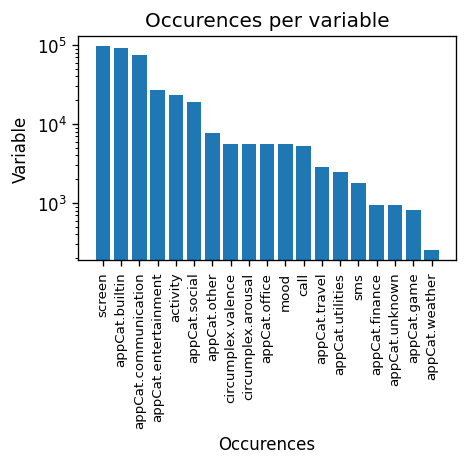

In [80]:
# Obtain variables and their count
variables_cnt = df.groupby(['variable']).count()
variables = variables_cnt.index.values
variables_cnt = variables_cnt.values[:,0]

# Sorting
p = variables_cnt.argsort()
variables_cnt = np.flip(variables_cnt[p])
variables = np.flip(variables[p])

# Simple bar plot
fig = plt.figure(figsize=(4,6), dpi=120)
ax = fig.add_subplot(2, 1, 1)

ax.bar(variables, variables_cnt, width=0.8)
ax.set_yscale('log')

plt.xticks(rotation=90, fontsize = 8)
ax.set_xlabel('Occurences')
ax.set_ylabel('Variable')
ax.set_title('Occurences per variable')

plt.tight_layout()
plt.show()
print(my_cmap)